## Random Sampling

In [1]:
import random

# Define a list of items to sample from
population = ["apple", "banana", "cherry", "durian", "elderberry", "fig", "grapefruit", "honeydew"]

# Specify the number of samples to draw
sample_size = 3

# Perform simple random sampling
sample = random.sample(population, sample_size)

# Print the sample
print(sample)

['banana', 'durian', 'apple']


## Stratified Sampling
Stratified Sampling is a sampling technique used to obtain samples that best represent the population. It reduces bias in selecting samples by dividing the population into homogeneous subgroups called strata, and randomly sampling data from each stratum (singular form of strata). 

In statistics, stratified sampling is used when the mean values of each stratum will differ.

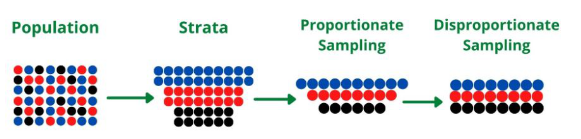

Stratified sampling is commonly used to create test datasets to evaluate models especially when the dataset is significantly large and unbalanced.  

### Steps involved in stratified sampling
- **Separating the Population into Strata:** In this step, the population is divided into strata based on similar characteristics and every member of the population must belong to exactly one stratum (singular of strata).
- **Determine the sample size:** Decide how small or large the sample should be.
- **Randomly sampling each stratum:** Random samples from each stratum are selected using either Disproportionate sampling where the sample size of each stratum is equal irrespective of the population size of the stratum or Proportionate sampling where the sample size of each stratum is proportional to the population size of the stratum.

**Step 1:** Create the dummy dataset from a python dictionary using pandas DataFrame 

In [2]:
import pandas as pd
  
# Create a dictionary of students
students = {
    'Name': ['Lisa', 'Kate', 'Ben', 'Kim', 'Josh',
             'Alex', 'Evan', 'Greg', 'Sam', 'Ella'],
    'ID': ['001', '002', '003', '004', '005', '006', 
           '007', '008', '009', '010'],
    'Grade': ['A', 'A', 'C', 'B', 'B', 'B', 'C', 
              'A', 'A', 'A'],
    
    'Category': [2, 3, 1, 3, 2, 3, 3, 1, 2, 1]
}
  
# Create dataframe from students dictionary
df = pd.DataFrame(students)
  
# view the dataframe
df

,Name,ID,Grade,Category
0,Lisa,001,A,2
1,Kate,002,A,3
2,Ben,003,C,1
3,Kim,004,B,3
4,Josh,005,B,2
5,Alex,006,B,3
6,Evan,007,C,3
7,Greg,008,A,1
8,Sam,009,A,2
9,Ella,010,A,1


Notice that there are 50% grade A students, 30% grade B students, and 20% grade C students.

**Step 2:** Create a sample of 6 students disproportionately (equal number of students from each grade stratum)

**Disproportionate Sampling:** Using pandas groupby, separate the students into groups based on their grade i.e A, B, C and randomly sample 2 students from each grade group using the sample function

In [3]:
df.groupby('Grade', group_keys=False).apply(lambda x: x.sample(2))

,Name,ID,Grade,Category
8,Sam,009,A,2
1,Kate,002,A,3
4,Josh,005,B,2
5,Alex,006,B,3
2,Ben,003,C,1
6,Evan,007,C,3


**Step 3:** Sample out 60% of students proportionately (create proportional samples from each stratum based on its proportion in the population)

**Proportionate Sampling:** Using pandas groupby, separate the students into groups based on their grade i.e A, B, C, and random sample from each group based on population proportion. The total sample size is 60%(0.6) of the population

Notice that even in the sample, there are 50% grade A students, 30% grade B students, and 20% grade C students.

### Example:

**Step 1:** Read in the dataset from the CSV file

In [4]:
import pandas as pd
  
# read the dataset as csv file
data = pd.read_csv('Data/Titanic.csv')
  
# drop the name column as it is of no importance here
data.drop('Name', axis=1, inplace=True)
  
# view the first 5 rows of the titanic dataset
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


**Step 2:** Check the percentage of dead/survived passengers

Check the proportion/percentage of passengers who died or survived this is given a number of dead or alive passengers / total number of passengers * 100

In [5]:
(data['Survived'].value_counts()) / len(data) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

where 0 represents passengers that died (61.6%) and 1 represents passengers that survived (38.4%)

**Step 3:** Disproportionately sample out  8 passengers (4 who died and 4 who survived)

In [6]:
# Disproportionate sampling:
# randomly select 4 samples from each stratum

data.groupby('Survived', group_keys=False).apply(lambda x: x.sample(4))


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
652,653,0,3,male,21.0,0,0,8475,8.4333,NaN,S
295,296,0,1,male,NaN,0,0,PC 17612,27.7208,NaN,C
811,812,0,3,male,39.0,0,0,A/4 48871,24.1500,NaN,S
757,758,0,2,male,18.0,0,0,29108,11.5000,NaN,S
535,536,1,2,female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
306,307,1,1,female,NaN,0,0,17421,110.8833,NaN,C
97,98,1,1,male,23.0,0,1,PC 17759,63.3583,D10 D12,C
781,782,1,1,female,17.0,1,0,17474,57.0000,B20,S


**Step 4:** Proportionately sample out  1%(0.01)  of passengers (0.6% died and 0.4% survived)

In [7]:
data.groupby('Survived', group_keys=False).apply(lambda x: x.sample(frac=0.01))

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
439,440,0,2,male,31.0,0,0,C.A. 18723,10.5000,NaN,S
181,182,0,2,male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
626,627,0,2,male,57.0,0,0,219533,12.3500,NaN,Q
158,159,0,3,male,NaN,0,0,315037,8.6625,NaN,S
624,625,0,3,male,21.0,0,0,54636,16.1000,NaN,S
81,82,1,3,male,29.0,0,0,345779,9.5000,NaN,S
539,540,1,1,female,22.0,0,2,13568,49.5000,B39,C
801,802,1,2,female,31.0,1,1,C.A. 31921,26.2500,NaN,S


## Cluster Sampling
Cluster sampling is a type of probability sampling in which every and each element of the population is selected equally, we use the subsets of the population as the sampling part rather than the individual elements for sampling.

The population is divided into subsets or subgroups that are considered as clusters, and from the numbers of clusters, we select the individual cluster for the next step to be performed.

**Now see the steps taken to perform cluster sampling on the population:**

**Step 1:** Define and identify the target population.

This is the first step we have to perform for sampling in this we have to clearly select the targeted area from the population.

For understanding in easy language let’s take an example of integers, integers are the number which can be written without fractional form like all negative and positive numbers ( -1,-4,-8,3,5,2,0……etc ) so we take all the integers as our data and from this data we have to select our targeted area for performing the sampling. From these data of integers, we can target either all the positive numbers or all the negative.

Here we assume that our targeted area is all positive numbers means we take all positive numbers from integers data as our sample.

<div>
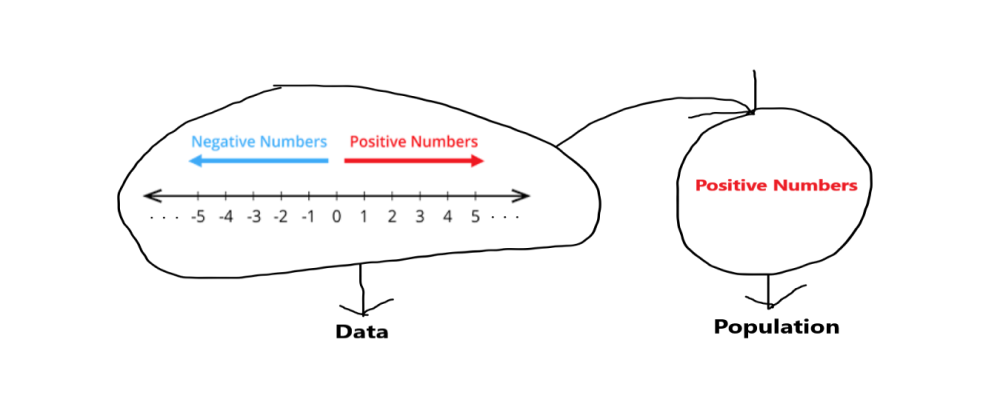
</div>

**Step 2:** Sampling method.

Here we use probability cluster sampling because every element from the population has an equal chance to select.

**Step 3:** Divide samples into clusters.

After we select the sampling method we divide samples into clusters, it is an important part of performing cluster sampling we have to create a quality cluster as they produce better accuracy after sampling. we remind that clusters we are producing have the better impact it means they represent well to our population. Clusters have to be equally and similarly distributed as there is no repetition among them. Ideally, each cluster should be a mini-representation of the entire population.

<div>
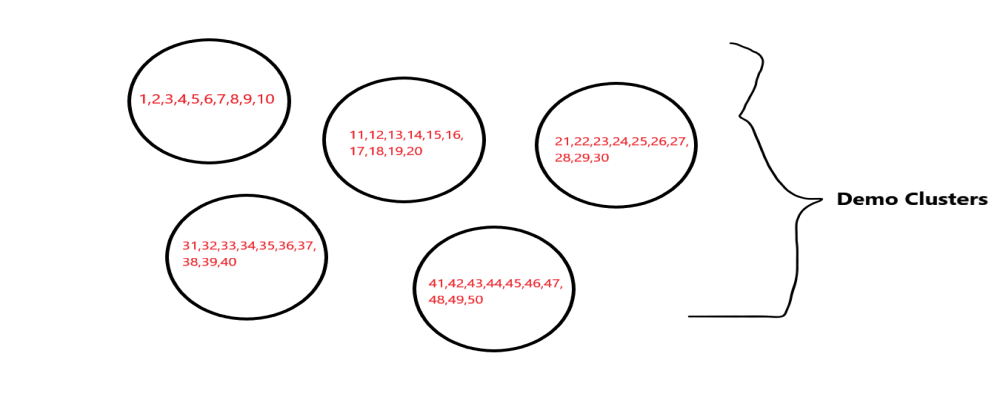
</div>

**Step 4:** Collect data.

In the last step after performing the above steps, we collect our desirable data from the sample. 

We take an example of cluster sampling in which we take 1 to n natural numbers that will make clusters and from that cluster, we select the random individual clusters for sampling.

<div>
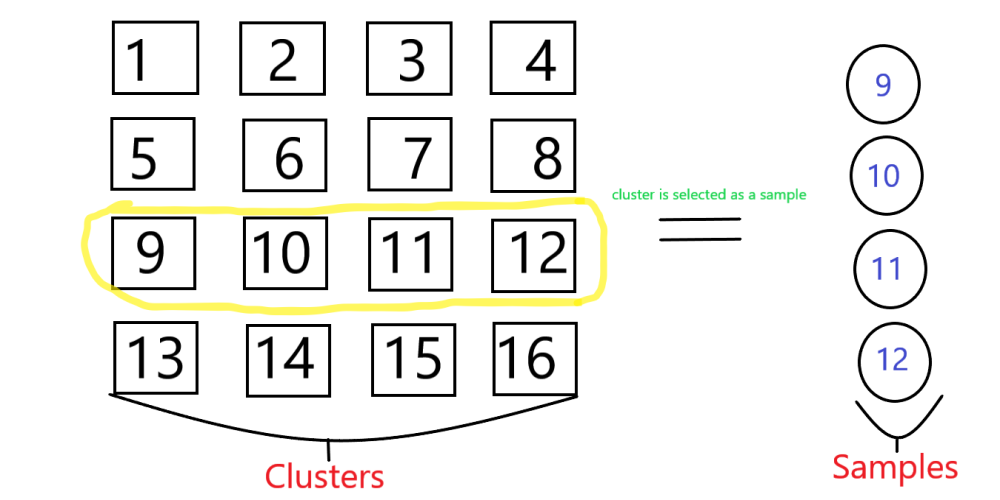
</div>

**N=16**, so we take samples from 1 to 16 and having an individual cluster of 4 numbers after that random from the clusters we select one cluster as a sample.

In [8]:
# import pandas
import pandas as pd
 
# import numpy
import numpy as np
 
# creating dictionary of data
data = {'N_numbers':np.arange(1,16)}
 
# creating dataframe
df = pd.DataFrame(data)
 
# sample of data
samples = df.sample(4)
print(samples)

    N_numbers
1           2
12         13
6           7
4           5


In this output, we see that from the N-numbers column having random numbers, by the way, this is our random cluster which contains 4 samples. With the help of Sample() set the no of samples that an individual cluster presents.

In [9]:
# importing modules
import pandas as pd
import numpy as np
 
#creating dictionary of data
dic_data = {'employee_id':np.arange(1,21),
                  'value':np.random.randn(20)}
 
# creating DataFrame from dictionary
df = pd.DataFrame(dic_data)
print(df)

    employee_id     value
0             1 -0.108344
1             2  0.423305
2             3 -0.246619
3             4 -2.369871
4             5  0.287943
5             6  0.071629
6             7  0.126754
7             8  0.343628
8             9 -1.293937
9            10  0.817556
10           11 -1.494793
11           12 -1.476767
12           13 -0.943245
13           14 -1.632510
14           15  0.187411
15           16 -0.703878
16           17  0.447802
17           18 -0.368845
18           19 -1.134541
19           20 -0.078352


Here we create DataFrame df which contain 20 employee id and each id having random values. From the dataset df, we take a random cluster that contains specific 4 random samples.

In [10]:
import pandas as pd
 
# import numpy
import numpy as np
 
# creating samples
samples = df.sample(4).sort_values(by='employee_id')
 
# show samples
print(samples)

    employee_id     value
4             5  0.287943
15           16 -0.703878
17           18 -0.368845
18           19 -1.134541


As you can see in our output that we collect data of 4 random employees which contain their employee_id and value. First, we create a sample variable and then assign it a sample of 4 random employees which acts as our data.